In [1]:
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
import pandas as pd
data=pd.read_excel('final_dataset.xlsx')

/Users/yvette/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Scientist VS. Entrepreneur

In [3]:

unique_orgs = data['highest_level_org'].dropna().unique()
unique_orgs[:50]

array(['Google', 'New York Times', 'Here Comes The Guillotine Podcast',
       'World Wrestling Entertainment', 'Government', 'NewYorker',
       'New York Magazine', 'US Food and Drug Administration',
       'Broad Institute', 'University of Maryland',
       'Carnegie Mellon University', "Ohio's Fourth District",
       'Brownstone Fellow', 'CNN', 'Revolution', 'Zeteo News',
       'ARKInvest', 'Geometric Intelligence',
       'Martian Ministry of Sthytix', 'Open Philanthropy', 'Flexport',
       'NousResearch', 'Conservatives', 'University of Toronto',
       'University of Oxford', 'Techmeme', 'LightningAI', 'isodope',
       'Humanity Forward', 'PWVentures', 'OpenAI',
       'Algorithmic Justice League', 'Amazon', 'Stanford University',
       'OpenReview', 'Optum', 'Google Ventures', 'Tufts University',
       'Good Steward Partners', 'Multiplex Magazine', 'Waabi_ai',
       'Deepmind', 'Cohere', 'Bloomberg', 'Radical Ventures',
       'McRock Capital', 'Retool', 'TakeoffAI', 'bl

In [4]:
def categorize_org(org):
    org = org.lower()
    if any(keyword in org for keyword in ['univ', 'institut', 'research']):
        return 'Scientist Org'
    elif any(keyword in org for keyword in ['ai']):
        return 'Entrepreneur Org'
    else:
        return 'Other'


data['org_category'] = data['highest_level_org'].fillna('').apply(categorize_org)

scientist_data = data[data['org_category'] == 'Scientist Org']
entrepreneur_data = data[data['org_category'] == 'Entrepreneur Org']

scientist_data.shape, entrepreneur_data.shape

((425, 39), (454, 39))

In [5]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
G_scientist = nx.DiGraph()
for index, row in scientist_data.iterrows():
    G_scientist.add_node(row['screenName_fo'], label=row['name_fo'])
    G_scientist.add_edge(row['screenName_kol'], row['screenName_fo'])

G_entrepreneur = nx.DiGraph()
for index, row in entrepreneur_data.iterrows():
    G_entrepreneur.add_node(row['screenName_fo'], label=row['name_fo'])
    G_entrepreneur.add_edge(row['screenName_kol'], row['screenName_fo'])

undirected_scientist_G = G_scientist.to_undirected()
undirected_entrepreneur_G = G_entrepreneur.to_undirected()


communities_scientist = greedy_modularity_communities(undirected_scientist_G)
communities_entrepreneur = greedy_modularity_communities(undirected_entrepreneur_G)

scientist_community_count = len(communities_scientist)
entrepreneur_community_count = len(communities_entrepreneur)

scientist_community_count, entrepreneur_community_count

(5, 6)

In [6]:
for index, row in scientist_data.iterrows():
    print(f"Adding node: {row['screenName_fo']}, edge from: {row['screenName_kol']} to {row['screenName_fo']}")
    G_scientist.add_node(row['screenName_fo'], label=row['name_fo'])
    G_scientist.add_edge(row['screenName_kol'], row['screenName_fo'])

Adding node: EricLander46, edge from: drfeifei to EricLander46
Adding node: EricLander46, edge from: demishassabis to EricLander46
Adding node: haldaume3, edge from: ylecun to haldaume3
Adding node: haldaume3, edge from: rsalakhu to haldaume3
Adding node: haldaume3, edge from: karpathy to haldaume3
Adding node: haldaume3, edge from: goodfellow_ian to haldaume3
Adding node: haldaume3, edge from: AndrewYNg to haldaume3
Adding node: KofmanMichael, edge from: drfeifei to KofmanMichael
Adding node: KofmanMichael, edge from: AndrewYNg to KofmanMichael
Adding node: Teknium1, edge from: karpathy to Teknium1
Adding node: Teknium1, edge from: AndrewYNg to Teknium1
Adding node: roydanroy, edge from: ylecun to roydanroy
Adding node: roydanroy, edge from: rsalakhu to roydanroy
Adding node: roydanroy, edge from: goodfellow_ian to roydanroy
Adding node: roydanroy, edge from: geoffreyhinton to roydanroy
Adding node: SandraWachter5, edge from: mustafasuleyman to SandraWachter5
Adding node: SandraWachte

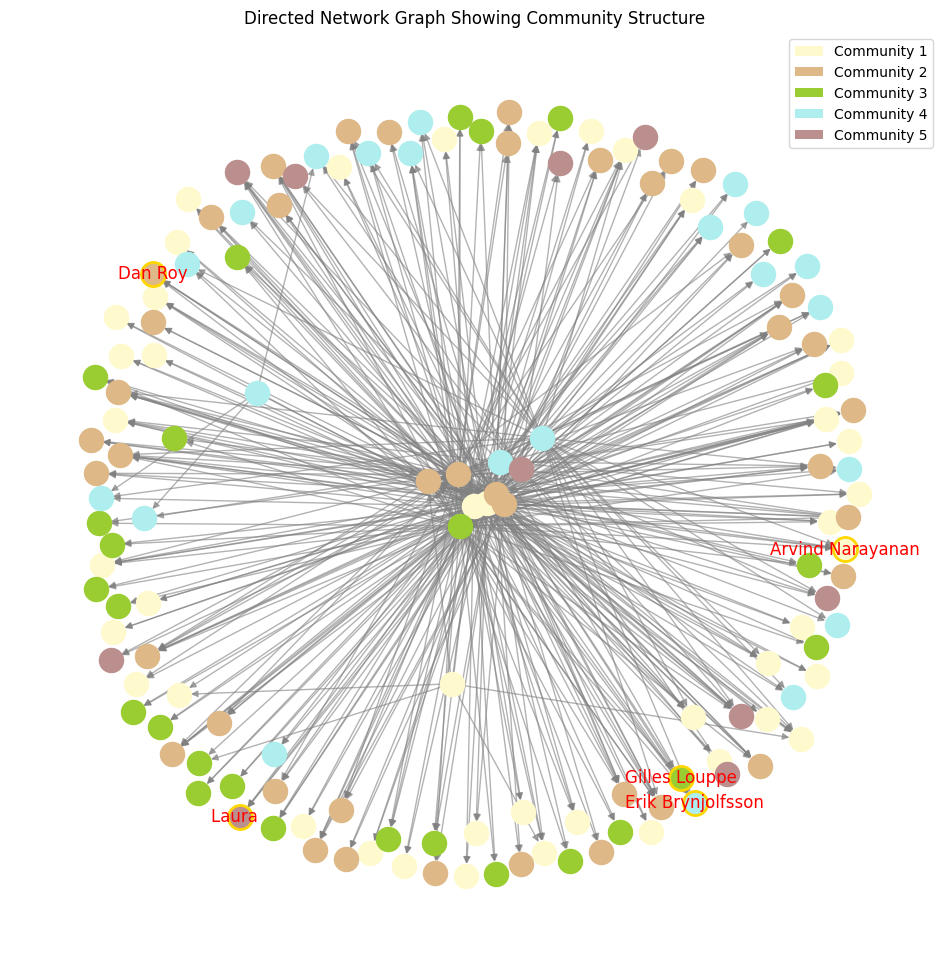

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def draw_directed_community_graph(G, communities):

    custom_colors = ['#FFFACD', '#DEB887', '#9ACD32', '#AFEEEE', '#BC8F8F', '#F08080']
    
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)  

    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray', alpha=0.6)
    

    for i, community in enumerate(communities):
     
        subgraph = G.subgraph(community)
        in_degrees = subgraph.in_degree()
        center_node = max(in_degrees, key=lambda x: x[1])[0]

      
        community_color = custom_colors[i % len(custom_colors)]  
        nx.draw_networkx_nodes(subgraph, pos, node_color=community_color, label=f"Community {i+1}")


        nx.draw_networkx_nodes(subgraph, pos, nodelist=[center_node], node_color=community_color, node_size=300, edgecolors='gold', linewidths=2)
        nx.draw_networkx_labels(subgraph, pos, labels={center_node: G.nodes[center_node]['label']}, font_color='red')


    legend_handles = [Patch(facecolor=custom_colors[i % len(custom_colors)], label=f"Community {i+1}") for i in range(len(communities))]
    plt.legend(handles=legend_handles, loc='upper right')
    
    plt.title("Directed Network Graph Showing Community Structure")
    plt.axis('off')
    plt.show()


draw_directed_community_graph(G_scientist, communities_scientist)

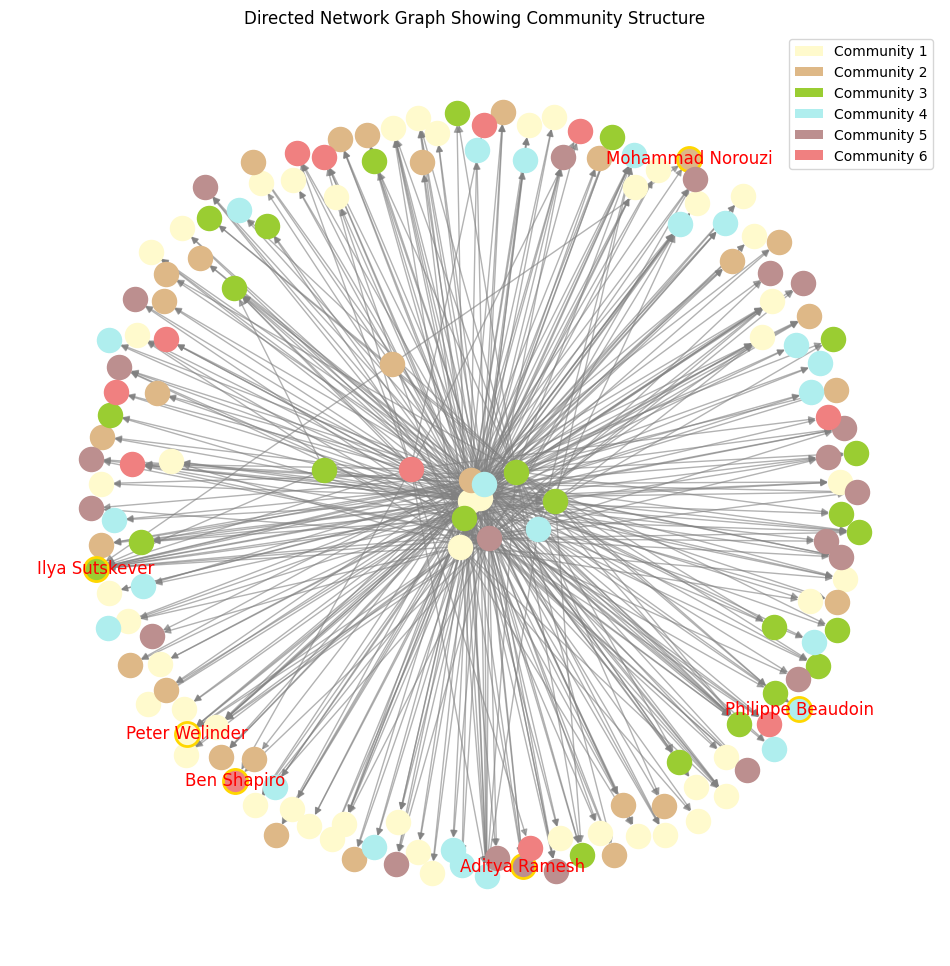

In [8]:
draw_directed_community_graph(G_entrepreneur, communities_entrepreneur)

In [9]:

filtered_data= data[(data['ai_related'] == 'Y') & 
                               (data['position_categorized'] == 'Founder & Executive')]

G_ai = nx.DiGraph()


for index, row in filtered_data.iterrows():
    G_ai .add_node(row['screenName_fo'], label=row['name_fo'])
    G_ai .add_edge(row['screenName_kol'], row['screenName_fo'])

G_ai_undirected = G_ai.to_undirected()


communities_ai = list(greedy_modularity_communities(G_ai_undirected))


central_nodes_corrected = {}
for i, community in enumerate(communities_ai):
    subgraph = G_ai.subgraph(community)
    in_degrees = subgraph.in_degree()
    central_node = max(in_degrees, key=lambda x: x[1])[0]
    central_nodes_corrected[central_node] = i

G_ai.number_of_nodes(), G_ai.number_of_edges(), central_nodes_corrected, len(communities_ai)


(140,
 484,
 {'quocleix': 0,
  'ShaneLegg': 1,
  'ilyasut': 2,
  'BillGates': 3,
  'peteratmsr': 4},
 5)

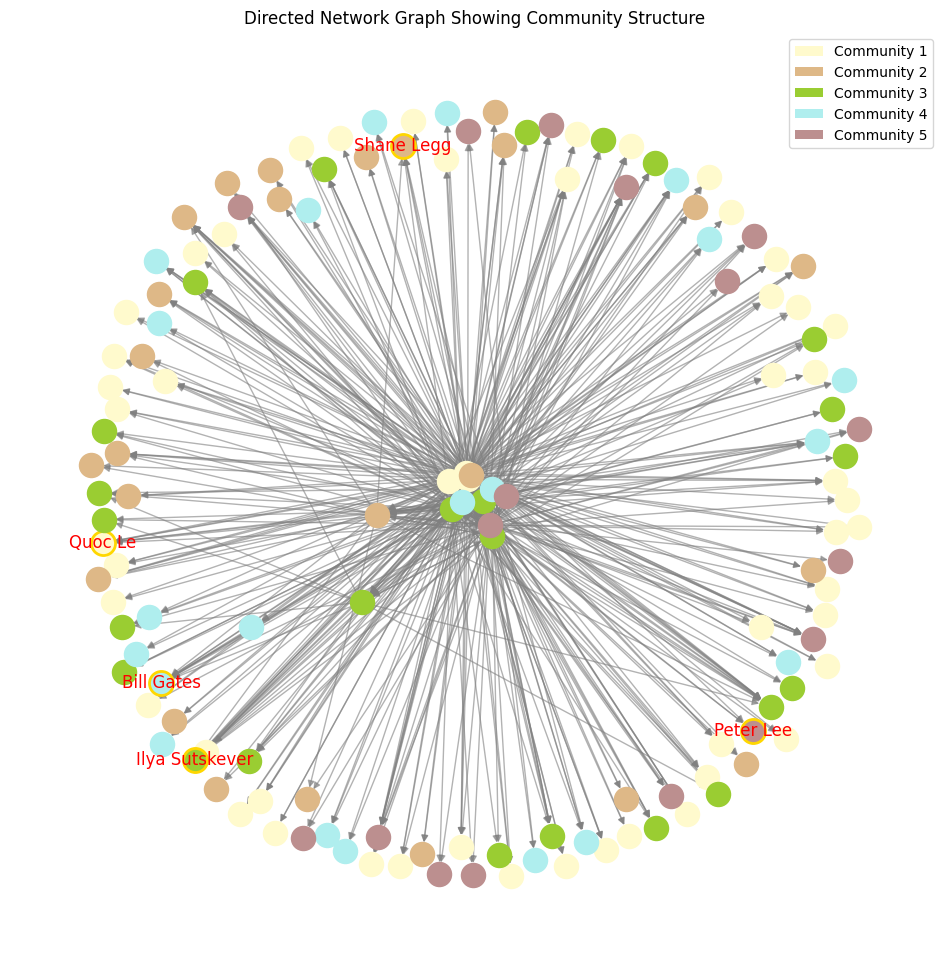

In [10]:
draw_directed_community_graph(G_ai, communities_ai)